In [1]:
height = 100
width = 100

edge_length = 20

num_squares = 25

obstacles = []

cols = int(num_squares**(1/2))
rows = int(num_squares**(1/2))

for c in range(cols): 
    cd = (c + 1)*(width/(cols - 1))
    print(cd)
    x = cd - edge_length/2
    
    for r in range(rows): 
        rd = (r + 1)*(height/(rows - 1))
        
        y = rd - edge_length/2
        
        obstacles.append(((x, y), edge_length))

25.0
50.0
75.0
100.0
125.0


In [2]:
import matplotlib.pyplot as plt
import random
import math

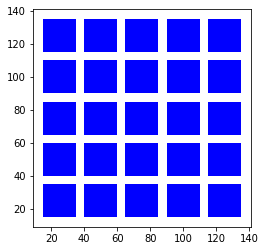

In [3]:
for obstacle in obstacles: 
    rectangle = plt.Rectangle(obstacle[0], obstacle[1], obstacle[1], fc='blue')
    plt.gca().add_patch(rectangle)

plt.axis('scaled')
plt.show()

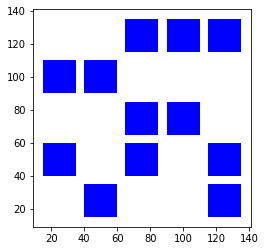

In [4]:
picked_obstacles = []

for obstacle in obstacles: 
    i = random.randint(0, 1)
    
    if i < 0.5: 
        picked_obstacles.append(obstacle)
        rectangle = plt.Rectangle(obstacle[0], obstacle[1], obstacle[1], fc='blue')
        plt.gca().add_patch(rectangle)

plt.axis('scaled')
plt.show()

In [5]:
def get_distance(p1, p2): 
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**(1/2)

In [6]:
# p1 should always be pos
def get_angle(pos, p2): 
    if p2[1] == pos[1]: 
        if pos[0] <= p2[0]:
            return 0
        else:
            return 180
    
    if p2[0] == pos[0]: 
        if p2[1] > pos[1]: 
            return 90
        else: 
            return 270
    
    m = (p2[1] - pos[1])/(p2[0] - pos[0])
    
    #1st v/s 3rd 
    if m > 0: 
        #1st
        if p2[1] > pos[1]: 
            return math.degrees(math.atan(m))
        
        #3rd
        else: 
            return 180 + math.degrees(math.atan(m))
        
    #2nd v/s 4th 
    if m < 0:
        #4th
        if p2[1] < pos[1]:
            return 360 + math.degrees(math.atan(m))
        #2nd
        else: 
            return 180 + math.degrees(math.atan(m))

In [7]:
def get_intersection(line1, line2): 
    
    A = (line1[1][1] - line1[0][1])/(line1[1][0] + 1e-11 - line1[0][0])
    B = (line1[0][1]*line1[1][0] - line1[0][0]*line1[1][1])/(line1[1][0] + 1e-11 - line1[0][0])
    
    C = (line2[1][1] - line2[0][1])/(line2[1][0] + 1e-11 - line2[0][0])
    D = (line2[0][1]*line2[1][0] - line2[0][0]*line2[1][1])/(line2[1][0] + 1e-11 - line2[0][0])
    
    if (A == C): 
        return None
    x = (D - B)/(A - C)
    y = A*x + B
    
    return (x, y)

In [8]:
def point_on_edge(edge, point):  
    if round(point[0], 2) >= round(min(edge[0][0], edge[1][0]), 2) and round(point[0], 2) <= round(max(edge[0][0], edge[1][0]), 2):
        if round(point[1], 2) >= round(min(edge[0][1], edge[1][1]), 2) and round(point[1], 2) <= round(max(edge[0][1], edge[1][1]), 2):
            return True
    return False

In [9]:
def distance_to_segment(edge, point): 
    mid_point = ((edge[0][0] + edge[1][0])/2, (edge[0][1] + edge[1][1])/2)
    
    return get_distance(mid_point, point)

In [10]:
def get_closest_segment(segments, pos): 
    closest_segment = ()
    closest_distance = math.inf
    for segment in segments: 
        if distance_to_segment(segment, point) < closest_distance: 
            closest_distance = distance_to_segment(segment, point)
            closest_segment = segment
    return closest_segment

In [11]:
def get_stopping_point(intersecting_walls, ray): 
    # ray should always have pos first
    stopping_point = ()
    shortest_distance = math.inf
    for wall in intersecting_walls: 
        point = get_intersection(wall, ray)
        if (round(point[0], 1) == round(wall[0][0], 1) and round(point[1], 1) == round(wall[0][1], 1)) or (round(point[0], 1) == round(wall[1][0], 1) and round(point[1], 1) == round(wall[1][1], 1)):
            #print("Bhen chod")
            pass
        else: 
            this_distance = get_distance(ray[0], point)
            if this_distance < shortest_distance: 
                shortest_distance = this_distance
                stopping_point = point
    return stopping_point

In [12]:
# edit to fix error
def get_stopping_point(intersecting_walls, ray, walls, pos): 
    # ray should always have pos first
    stopping_point = ()
    shortest_distance = math.inf
    for wall in intersecting_walls: 
        point = get_intersection(wall, ray)
        found_point = True
        if (round(point[0], 1) == round(wall[0][0], 1) and round(point[1], 1) == round(wall[0][1], 1)) or (round(point[0], 1) == round(wall[1][0], 1) and round(point[1], 1) == round(wall[1][1], 1)):
            point_to_index = round(point[0], 0) + 0.0
            point_to_index_2 = round(point[1], 0) + 0.0
            wall_ends = walls[(point_to_index, point_to_index_2) + (get_angle(pos, (point_to_index, point_to_index_2)),)]
            angle_1 = round(wall_ends[0][2], 2)
            angle_2 = round(wall_ends[1][2], 2)
            curr_angle = round(get_angle(pos, point), 2)
            
            lesser_angle = min(angle_1, angle_2)
            higher_angle = max(angle_1, angle_2)
            
            if not(curr_angle < higher_angle and curr_angle > lesser_angle):
                found_point = False
                
        if found_point:
            this_distance = get_distance(ray[0], point)
            if this_distance < shortest_distance: 
                shortest_distance = this_distance
                stopping_point = point
    return stopping_point



In [14]:
def get_intersecting_walls(edge, walls): 
    # edge should always have pos first
    intersecting_walls = []
    A = (edge[1][1] - edge[0][1])/(edge[1][0] + 1e-11 - edge[0][0])
    B = (edge[0][1]*edge[1][0] - edge[0][0]*edge[1][1])/(edge[1][0] + 1e-11 - edge[0][0])
    
    for start in walls: 
        for end in walls[start]: 
            C = (end[1] - start[1])/(end[0] + 1e-11 - start[0])
            D = (start[1]*end[0] - start[0]*end[1])/(end[0] + 1e-11 - start[0])
            if C == A: 
                pass
            else: 
                x = (B - D)/(C - A)
                y = A*x + B
                
                add_to_walls = False
                if point_on_edge((start, end), (x, y)):
                    if edge[0][0] <= edge[1][0]:
                        if x > edge[0][0]: 
                            add_to_walls = True
                    elif edge[0][0] >= edge[1][0]: 
                        if x < edge[0][0]:
                            add_to_walls = True
                if add_to_walls == True: 
                    intersecting_walls.append((start, end))
                    
    return intersecting_walls

In [15]:
walls_test = {(1,5):[(3,3), (0, 1)], (3, 3): [(1,5), (3, 0)]}
line_test = ((0, 0), (4, 2))
get_intersecting_walls(line_test, walls_test)

[((3, 3), (3, 0))]

In [16]:
def get_third(elem): 
    print(elem)
    return elem[2]

In [25]:
# get all the points in the chosen set 

# each point in points has the position of the point plus angle with position

lidar_range = 10
diff = lidar_range/2
x = random.randint(width/4, 3*width/4)
y = random.randint(height/4, 3*height/4)

pos = (x, y)

points = []

walls = {}

for obstacle in picked_obstacles: 
    obstacle_edge = obstacle[1]
    
    p1 = obstacle[0] + (get_angle(pos, obstacle[0]),)
    p2 = (obstacle[0][0], obstacle[0][1] + obstacle_edge) + (get_angle(pos, (obstacle[0][0], obstacle[0][1] + obstacle_edge)),)
    p3 = (obstacle[0][0] + obstacle_edge, obstacle[0][1]) + (get_angle(pos, (obstacle[0][0] + obstacle_edge, obstacle[0][1])),)
    p4 = (obstacle[0][0] + obstacle_edge, obstacle[0][1] + obstacle_edge) + (get_angle(pos, (obstacle[0][0] + obstacle_edge, obstacle[0][1] + obstacle_edge)),)
    
    points.append(p1)
    points.append(p2)
    points.append(p3)
    points.append(p4)
    
    points.sort(key=get_third)
    
    walls[p1] = [p2, p3]
    walls[p2] = [p1, p4]
    walls[p3] = [p1, p4]
    walls[p4] = [p2, p3]
    
    

(15.0, 40.0, 181.90915243299636)
(15.0, 60.0, 147.65255650055798)
(35.0, 40.0, 185.71059313749964)
(35.0, 60.0, 117.75854060106002)
(35.0, 60.0, 117.75854060106002)
(15.0, 60.0, 147.65255650055798)
(15.0, 40.0, 181.90915243299636)
(35.0, 40.0, 185.71059313749964)
(15.0, 90.0, 121.47683934958398)
(15.0, 110.0, 113.4985656759521)
(35.0, 90.0, 101.53462065364472)
(35.0, 110.0, 98.24632081446853)
(35.0, 110.0, 98.24632081446853)
(35.0, 90.0, 101.53462065364472)
(15.0, 110.0, 113.4985656759521)
(35.0, 60.0, 117.75854060106002)
(15.0, 90.0, 121.47683934958398)
(15.0, 60.0, 147.65255650055798)
(15.0, 40.0, 181.90915243299636)
(35.0, 40.0, 185.71059313749964)
(40.0, 15.0, 259.1144729453413)
(40.0, 35.0, 230.19442890773482)
(60.0, 15.0, 299.9816393688493)
(60.0, 35.0, 338.1985905136482)
(35.0, 110.0, 98.24632081446853)
(35.0, 90.0, 101.53462065364472)
(15.0, 110.0, 113.4985656759521)
(35.0, 60.0, 117.75854060106002)
(15.0, 90.0, 121.47683934958398)
(15.0, 60.0, 147.65255650055798)
(15.0, 40.0, 

In [26]:
walls[(0, 0, get_angle(pos, (0, 0)))] = [(0, 140, get_angle(pos, (0, 140))), (140, 0, get_angle(pos, (140, 0)))]
walls[(140, 140, get_angle(pos, (140, 140)))] = [(140, 0, get_angle(pos, (140, 0))), (0, 140, get_angle(pos, (0, 140)))]

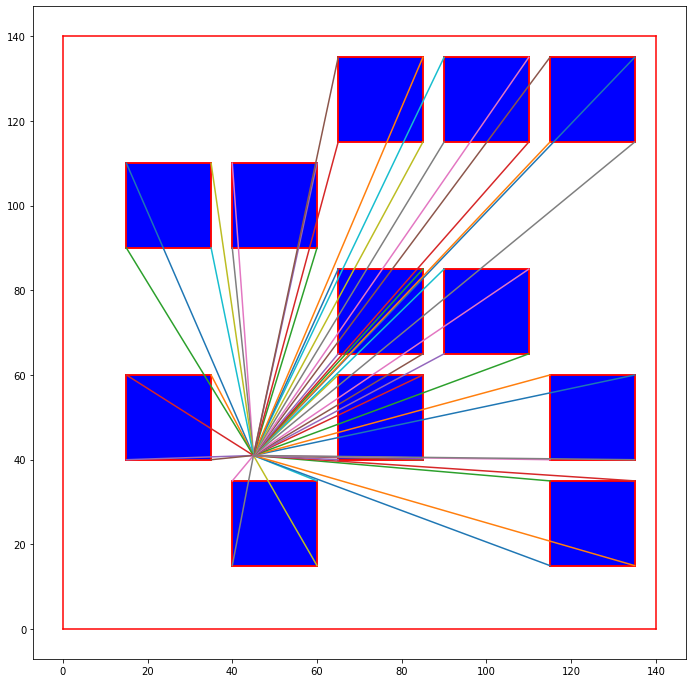

In [33]:
plt.figure(figsize = (12, 12))

for start in walls: 
    for end in walls[start]: 
        plt.plot([start[0], end[0]], [start[1], end[1]], color = 'red')

for obstacle in picked_obstacles: 
    rectangle = plt.Rectangle(obstacle[0], obstacle[1], obstacle[1], fc='blue')
    plt.gca().add_patch(rectangle)
    
n = 0
for point in points: 
    plt.plot([pos[0], point[0]], [pos[1], point[1]])
    plt.savefig('Rectangle_Point/Frame%03d.png' %n)
    n += 1


plt.axis('scaled')
plt.show()

In [44]:
# save files to create animation
from os import listdir
from os.path import isfile, join
mypath = 'Rectangle_Point_Stoppage/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [45]:
# save files to create animation
def get_elem(thing):
    return thing[5:8]

onlyfiles.sort(key=get_elem)

In [46]:
# save files to create animations
import imageio
images = []

for filename in onlyfiles:
    images.append(imageio.imread('Rectangle_Point_Stoppage/' + filename))
imageio.mimsave('Rectangle_Point_Stoppage/movie.gif', images)

(45, 41)


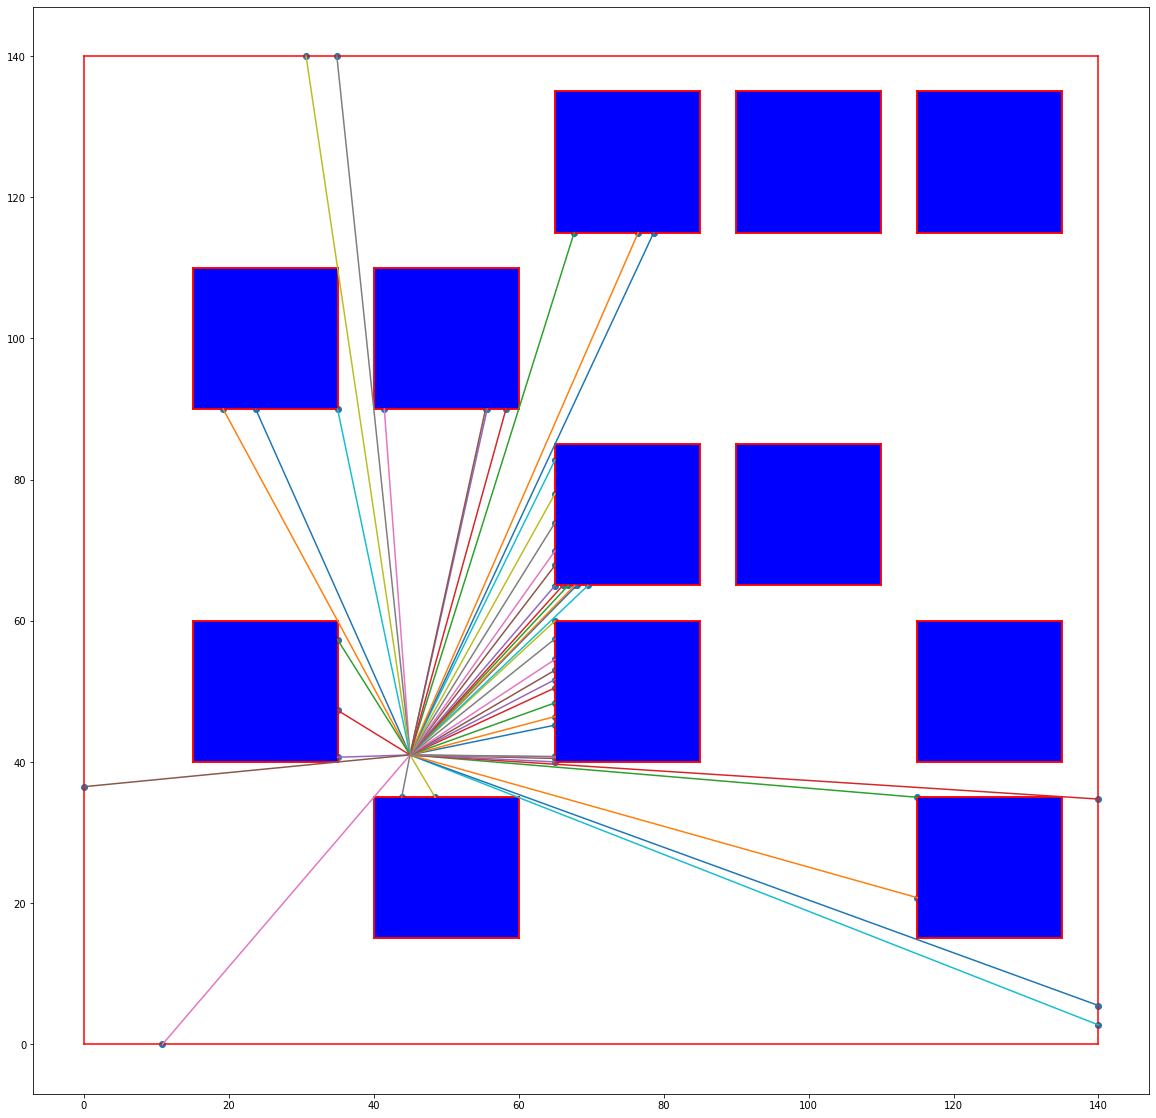

<Figure size 432x288 with 0 Axes>

In [43]:
# sweep horizontally from right then upward (counterclockwise)

plt.figure(figsize = (20, 20))
print(pos)
p2_x = []
p2_y = []

for obstacle in picked_obstacles: 
    rectangle = plt.Rectangle(obstacle[0], obstacle[1], obstacle[1], fc='blue')
    plt.gca().add_patch(rectangle)
    
for start in walls: 
    for end in walls[start]: 
        plt.plot([start[0], end[0]], [start[1], end[1]], color = 'red')
        
n = 0
for point in points: 
    intersecting_walls = get_intersecting_walls((pos, (point[0], point[1])), walls)
    if intersecting_walls == []: 
        
        plt.plot([pos[0], point[0]], [pos[1], point[1]])
        
    else: 
        
        stopping_point = get_stopping_point(intersecting_walls, (pos, point), walls, pos)
        
        if stopping_point != ():
            plt.plot([pos[0], stopping_point[0]], [pos[1], stopping_point[1]])
            plt.savefig('Rectangle_Point_Stoppage/Frame%03d.png' %n)
            n += 1
            p2_x.append(stopping_point[0])
            p2_y.append(stopping_point[1])



plt.scatter(p2_x, p2_y)

plt.show()   
plt.savefig('Algorithm_Rectangle.png')